In [ ]:
#pip install seaborn 

In [ ]:
#pip install tqdm

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
from tqdm.notebook import tqdm

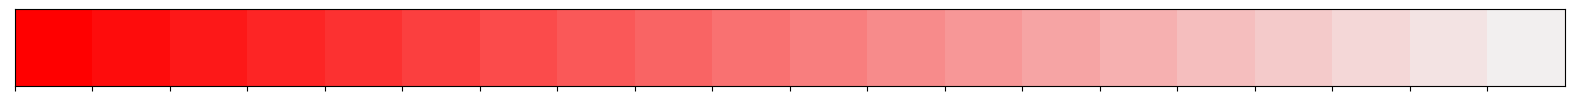

In [3]:
# задание палитры цветов
color_palette = sns.light_palette('red', n_colors=20, reverse=True)
sns.palplot(color_palette)
plt.show()

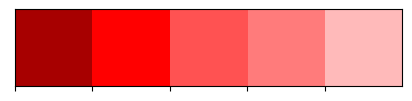

In [4]:
# задание палитры цветов
colors = ['#a70000', '#ff0000', '#ff5252', '#ff7b7b', '#ffbaba']
sns.palplot(sns.color_palette(colors))

In [5]:
import matplotlib.colors as mcolors


def make_colormap(seq):
    
    """ функция создания пользовательского
            масштабируемого цвета """
    
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

In [6]:
# задание палитры цветов красного
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('darkred'), c('brown'), 0.20, c('brown'), c('red'), 0.40, c('red'), \
                     c('indianred'), 0.60, c('indianred'), c('lightcoral'), 0.80, c('lightcoral')])

In [7]:
# задание палитры цветов красного
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('lightcoral'), c('lightcoral'), 0.20, c('lightcoral'), c('red'), 0.40, c('red'), \
                     c('brown'), 0.60, c('brown'), c('darkred'), 0.80, c('darkred')])

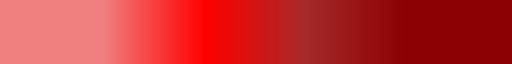

In [8]:
# вывод пользовательской палитры
rvb

In [9]:
# считывание данных с геоданными Московской агломерации
adm = pd.read_csv('data_clean/adm.csv')

In [10]:
# вывод данных
adm.head()

,geometry,cell_zid,adm_name,okrug_name,sub_ter,area,conts_zid
0,MULTIPOLYGON (((38.6495389842383 54.2597139180...,0,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
1,MULTIPOLYGON (((38.6549362377517 54.2572466621...,1,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
2,MULTIPOLYGON (((38.6625773861122 54.2560891872...,2,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
3,MULTIPOLYGON (((38.670279125503 54.25708620909...,3,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
4,MULTIPOLYGON (((38.6779821287111 54.2581143832...,4,Серебряные пруды,Серебряные пруды,Московская область,0.25,1


In [11]:
# проверка на наличие пропусков
adm.isna().sum()

geometry      0
cell_zid      0
adm_name      0
okrug_name    0
sub_ter       0
area          0
conts_zid     0
dtype: int64

In [12]:
adm.shape

(203634, 7)

В данных **203 634** строк и **7** признаков

### Анализ изменения численности населения по секторам Московской агломерации

In [13]:
# считывание данных по изменению численности населения
clocation = pd.read_csv('data/01_Clocation_202109.csv')

In [14]:
# вывод данных
clocation.head()

,dt,zid,customers_cnt_home,customers_cnt_job,customers_cnt_day,customers_cnt_night
0,2021-09-30,32909,1,0,0,3
1,2021-09-30,32910,2,0,0,4
2,2021-09-30,33261,0,0,0,2
3,2021-09-30,33262,1,0,0,5
4,2021-09-30,33263,0,0,0,4


In [15]:
# проверка на наличие пропусков
clocation.isna().sum()

dt                     0
zid                    0
customers_cnt_home     0
customers_cnt_job      0
customers_cnt_day      0
customers_cnt_night    0
dtype: int64

In [16]:
# тип данных
clocation.dtypes

dt                     object
zid                     int64
customers_cnt_home      int64
customers_cnt_job       int64
customers_cnt_day       int64
customers_cnt_night     int64
dtype: object

In [17]:
# размерность данных
clocation.shape

(10169, 6)

В данных представлена информация по Изменению численности населения по **10 169** сектору Московской агломерации 

In [18]:
# признаки данных
clocation.columns

Index(['dt', 'zid', 'customers_cnt_home', 'customers_cnt_job',
       'customers_cnt_day', 'customers_cnt_night'],
      dtype='object')

In [19]:
'customers_cnt_home'.replace('customers_', '')

'cnt_home'

In [20]:
# переименование признаков
clocation.columns = [column.replace('customers_', '') for column in clocation.columns]

In [21]:
# проверка изменений
clocation.columns

Index(['dt', 'zid', 'cnt_home', 'cnt_job', 'cnt_day', 'cnt_night'], dtype='object')

In [22]:
# количество секторов в Московской агломерации с данными по изменению численности
clocation['zid'].nunique()

10169

In [23]:
# смена типа данных
clocation['dt'] = pd.to_datetime(clocation['dt'])

In [24]:
# период сбора данных по изменению численности населения
clocation['dt'].agg(['min', 'max'])

min   2021-09-30
max   2021-09-30
Name: dt, dtype: datetime64[ns]

Данные по изменению численности населения Московской агломерации собраны за **30 сентября 2021 г.**

In [25]:
# удаление признака даты
clocation.drop(columns='dt', inplace=True)

In [26]:
# размерность DataFrame до объединения
clocation.shape

(10169, 5)

In [27]:
# объединение данных изменения численности населения с данными административных районов Московской агломерации
clocation = clocation.merge(adm, left_on='zid', right_on='cell_zid')

In [28]:
# размерность DataFrame после объединения
clocation.shape

(13877, 12)

Размерность данных изменилась. Ранее при анализе геоданных Московской агломерации было установлено, что в отдельные сектора попадают границы нескольких административных районов. При этом площадь административных районов не всегда пропорциональна друг другу. В результате чего при объединении данных происходит искажение изменения численности населения.

In [29]:
# вывод данных
clocation.head()

,zid,cnt_home,cnt_job,cnt_day,cnt_night,geometry,cell_zid,adm_name,okrug_name,sub_ter,area,conts_zid
0,32909,1,0,0,3,MULTIPOLYGON (((37.0381820225216 55.1447963241...,32909,Роговское,Троицкий административный округ,Новая Москва,0.25,1
1,32910,2,0,0,4,MULTIPOLYGON (((37.0491591764593 55.1435323229...,32910,Чехов,Чехов,Московская область,0.25,2
2,32910,2,0,0,4,MULTIPOLYGON (((37.0413250215264 55.1428123279...,32910,Роговское,Троицкий административный округ,Новая Москва,0.25,2
3,33261,0,0,0,2,MULTIPOLYGON (((37.0297812230894 55.1492561616...,33261,Роговское,Троицкий административный округ,Новая Москва,0.25,1
4,33262,1,0,0,5,MULTIPOLYGON (((37.03342789332 55.147514160921...,33262,Роговское,Троицкий административный округ,Новая Москва,0.25,1


In [30]:
# удаление признака разбиения сектора
clocation.drop(columns=['cell_zid'], inplace=True)

In [31]:
# проверка удаления признака
clocation.columns

Index(['zid', 'cnt_home', 'cnt_job', 'cnt_day', 'cnt_night', 'geometry',
       'adm_name', 'okrug_name', 'sub_ter', 'area', 'conts_zid'],
      dtype='object')

In [32]:
# показатели изменения численности населения Московской агломерации
indicator = clocation.columns[1:5]
indicator

Index(['cnt_home', 'cnt_job', 'cnt_day', 'cnt_night'], dtype='object')

In [33]:
# задание формата отображения чисел
pd.options.display.float_format ='{:,.2f}'.format

In [34]:
# сводная статистика изменения численности населения Московской агломерации
clocation[indicator].describe().T

,count,mean,std,min,25%,50%,75%,max
cnt_home,"13,877.00",884.24,"1,425.08",0.00,0.00,93.00,"1,278.00","10,601.00"
cnt_job,"13,877.00",495.62,938.38,0.00,9.00,75.00,699.00,"24,654.00"
cnt_day,"13,877.00",748.78,"1,248.03",0.00,10.00,102.00,"1,136.00","27,365.00"
cnt_night,"13,877.00","1,310.40","2,006.33",0.00,24.00,216.00,"1,934.00","21,185.00"


Видно, что признаки количества человек, проживавших в районе, работавших в районе, находившихся в районе приблизительно сопоставимы друг другу. Признак ночевавших в районе имеет иное распределение, что может свидетельствовать о том, что в данные изменения численности населения входят жители, которые не проживают в Московской агломерации. А данные жители приезжают в Московскую агломерацию на работу или по иным целям.

In [35]:
# корреляция признаков изменения численности населения Московской агломерации
clocation_corr = clocation[indicator].corr()
clocation_corr

,cnt_home,cnt_job,cnt_day,cnt_night
cnt_home,1.00,0.63,0.81,0.98
cnt_job,0.63,1.00,0.96,0.70
cnt_day,0.81,0.96,1.00,0.85
cnt_night,0.98,0.70,0.85,1.00


C:\Users\rus_k\AppData\Local\Temp\ipykernel_7840\52156929.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(clocation_corr, dtype=np.bool))


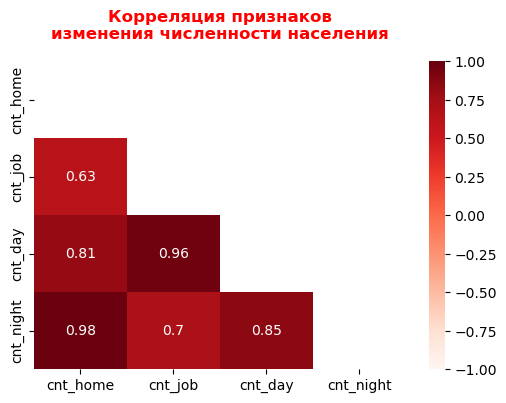

In [36]:
# визуалиция корреляция признаков изменения численности населения Московской агломерации
plt.figure(figsize=(6, 4))
mask = np.triu(np.ones_like(clocation_corr, dtype=np.bool))
clocation_corr_heatmap = sns.heatmap(clocation_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='Reds')
clocation_corr_heatmap.set_title('Корреляция признаков\nизменения численности населения', \
                                 c='r', fontweight='bold', fontdict={'fontsize':12}, pad=16)
plt.show()

Наблюдается очень высокая корреляция признаков изменения численности населения:
* находились в районе/работающих в районе
* проживающих в районе/ночевавших в районе
* ночевавших в районе/находились в районе

**ВЫВОДЫ** \
Данные корреляции свидетельствуют о том, что миграция населения в рамках Московской агломерации по соответствующим секторам не значительна.

In [37]:
clocation.columns

Index(['zid', 'cnt_home', 'cnt_job', 'cnt_day', 'cnt_night', 'geometry',
       'adm_name', 'okrug_name', 'sub_ter', 'area', 'conts_zid'],
      dtype='object')

In [38]:
# импорт необходимых библиотек
from scipy.stats.stats import pearsonr

C:\Users\rus_k\AppData\Local\Temp\ipykernel_7840\1755084232.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [39]:
# функция проверки теста Пирсона - статистической значимости корреляции признаков
def pearsonr_test(pvalue, alfa):
    
    """
    pvalue : уровень статистической значимости, float
    alfa : критический уровень значимости (вероятность ошибки I рода), float
    """
    
    if pvalue < alfa:
        print(f'Корреляция признаков статистически ЗНАЧИМА с вероятностью {1-alfa} %')
    else:
        print(f'Корреляция признаков статистически НЕ ЗНАЧИМА с вероятностью {1-alfa} %')

In [40]:
# проверка статистической значимости корреляции признаков изменения численности проживающих в районе/ночевавших в районе
statistic, pvalue = pearsonr(clocation['cnt_home'], clocation['cnt_night'])

In [41]:
pearsonr_test(pvalue, 0.05)

Корреляция признаков статистически ЗНАЧИМА с вероятностью 0.95 %


In [42]:
# проверка статистической значимости корреляции признаков изменения численности ночевавших в районе/находились в районе
statistic, pvalue = pearsonr(clocation['cnt_night'], clocation['cnt_day'])

In [43]:
pearsonr_test(pvalue, 0.05)

Корреляция признаков статистически ЗНАЧИМА с вероятностью 0.95 %


In [44]:
# проверка статистической значимости корреляции признаков изменения численности находились в районе/работающих в районе
statistic, pvalue = pearsonr(clocation['cnt_job'], clocation['cnt_day'])

In [45]:
pearsonr_test(pvalue, 0.05)

Корреляция признаков статистически ЗНАЧИМА с вероятностью 0.95 %


C:\Users\rus_k\anaconda3\envs\geo_env\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\rus_k\anaconda3\envs\geo_env\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\rus_k\anaconda3\envs\geo_env\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\rus_k\anaconda3\envs\geo_env\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  func(x=vector, **plot_kwargs)
C:\Users\rus_k\anaconda3\envs\geo_env\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The palette list has more values (5) than needed (3), which may not be in

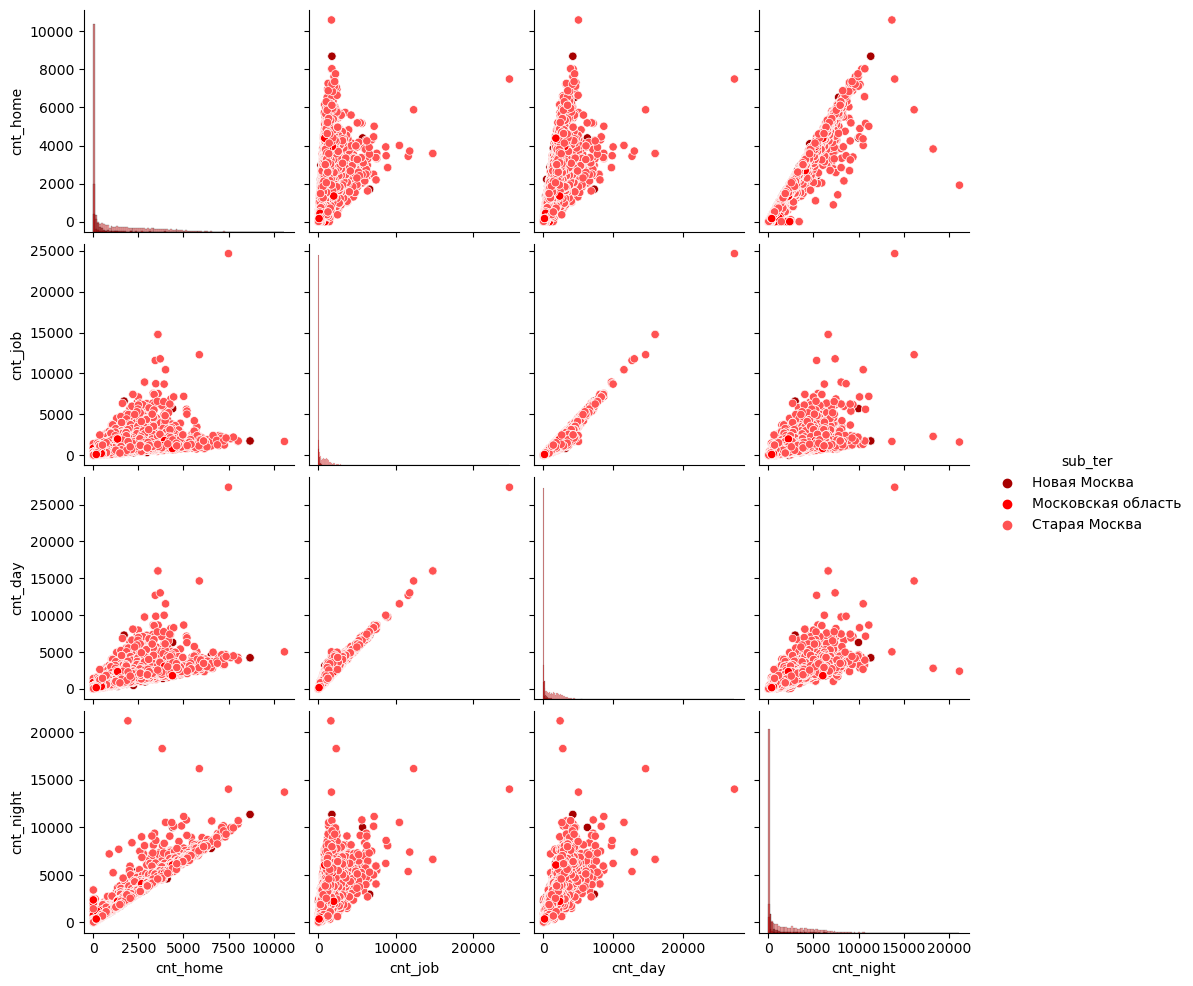

In [46]:
# визуализация корреляции признаков
sns.pairplot(clocation.iloc[:,1:-2], hue='sub_ter', diag_kind='hist', palette=sns.color_palette(colors))
plt.show()

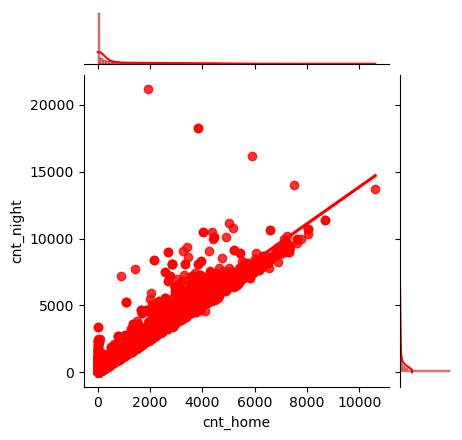

In [47]:
# визуализация корреляции признаков изменения численности проживающих в районе/ночевавших в районе
sns.jointplot(x = clocation['cnt_home'], y = clocation['cnt_night'], \
              height=4.5, kind = 'reg', color='red', data = clocation)
plt.show()

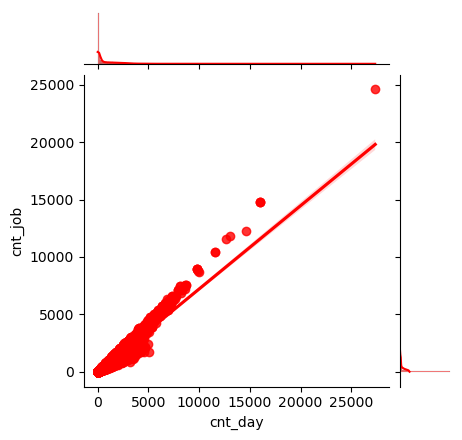

In [48]:
# визуализациякорреляции признаков изменения численности находились в районе/работающих в районе
sns.jointplot(x = clocation['cnt_day'], y = clocation['cnt_job'], \
              height=4.5, kind = 'reg', color='red', data = clocation)
plt.show()

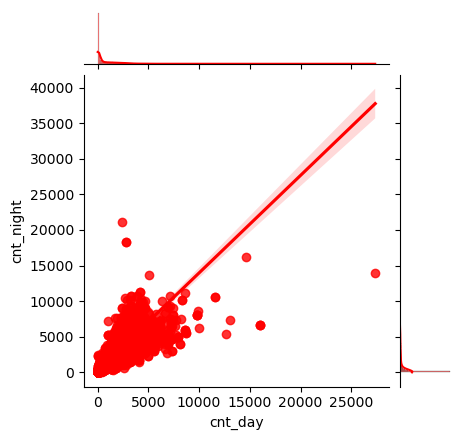

In [49]:
# визуализация корреляции признаков изменения численности ночевавших в районе/находились в районе
sns.jointplot(x = clocation['cnt_day'], y = clocation['cnt_night'], \
              height=4.5, kind = 'reg', color='red', data = clocation)
plt.show()

Наибольшая корреляция наблюдается между признаками изменения численности находились в районе/работающих в районе. \
То есть чем больше населения находится в секторе, тем больше населения ночует в этом секторе.

In [50]:
clocation_corr

,cnt_home,cnt_job,cnt_day,cnt_night
cnt_home,1.00,0.63,0.81,0.98
cnt_job,0.63,1.00,0.96,0.70
cnt_day,0.81,0.96,1.00,0.85
cnt_night,0.98,0.70,0.85,1.00


In [51]:
clocation.columns

Index(['zid', 'cnt_home', 'cnt_job', 'cnt_day', 'cnt_night', 'geometry',
       'adm_name', 'okrug_name', 'sub_ter', 'area', 'conts_zid'],
      dtype='object')

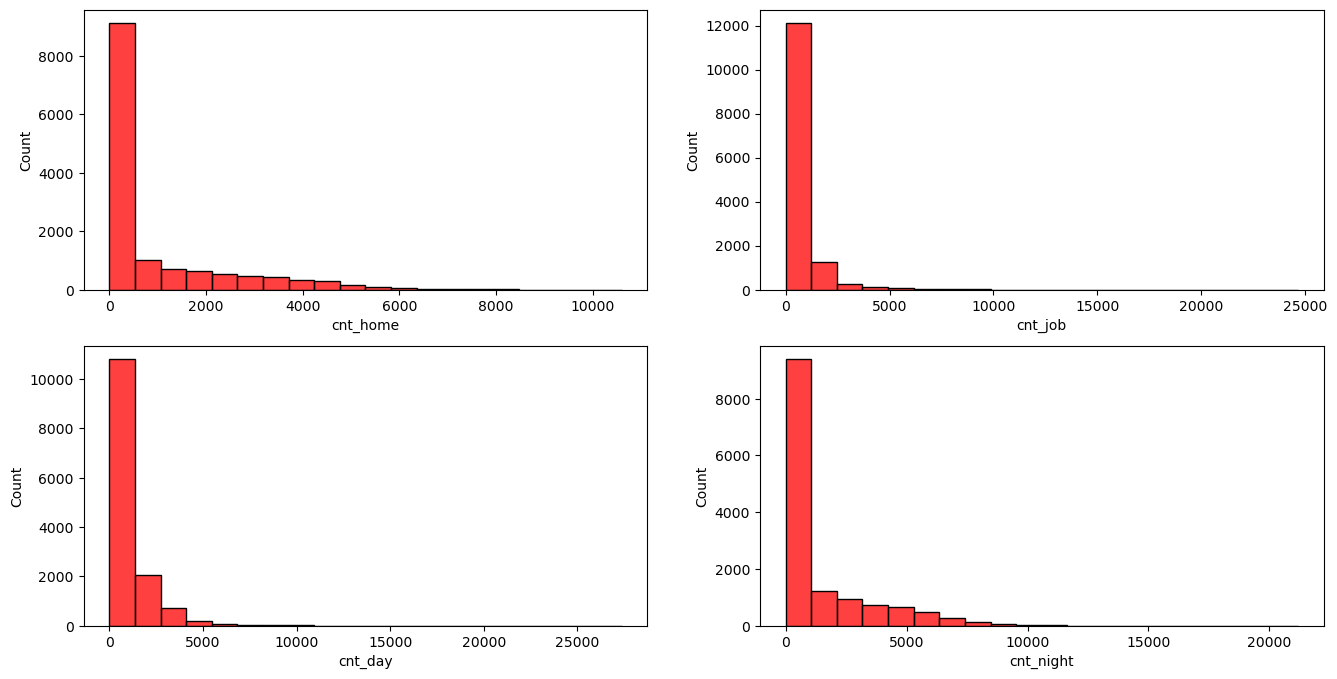

In [52]:
# визуализация распределения признаков изменения численности населения Московской агломерации
width = 2
height = 2
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(indicator):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=clocation, color='r',
            x=column_name, bins = 20);

Из распределения признаков изменения численности населения Московской агломерации видно, что в большинстве секторов населения нет.

In [53]:
# импорт библиотеки для работы с географическими координатами
from shapely import wkt

In [54]:
# импорт библиотеки для работы с геоданными
import geopandas as gpd

In [55]:
# преобразование признака в географические координаты
clocation['geometry'] = clocation['geometry'].apply(wkt.loads)

In [56]:
# задание геометрии DataFrame
clocation = clocation.set_geometry('geometry')

In [57]:
# вывод проекции
print(clocation.crs)

None


In [58]:
# задание проектции
clocation.crs = "epsg:3857"

In [59]:
print(clocation.crs)

epsg:3857


In [60]:
#непосредственно преобразование проекции
clocation = clocation.to_crs({'init' :'epsg:3857'}) 

C:\Users\rus_k\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


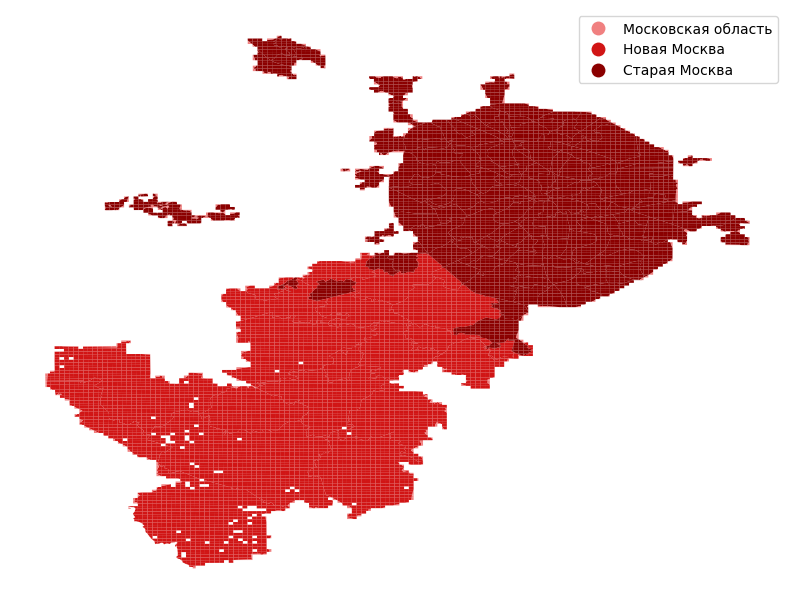

In [61]:
# визуализация субъектов Московской агломерации с данными по изменению численности населения
clocation.plot(column = 'sub_ter', linewidth=0.5, cmap=rvb, legend=True, figsize=[10,10])
plt.box(on=None)
plt.xticks([])
plt.yticks([])
plt.show()

Видно, что в данные по изменению численности населения попали границы Московской области. Так же отсутствуют данные по изменению численности в отдельных секторах Новой Москвы

In [62]:
# процентное соотнощения секторов по субъектам Московской агломерации
clocation['sub_ter'].value_counts(normalize=True)

Новая Москва         0.48
Старая Москва        0.47
Московская область   0.05
Name: sub_ter, dtype: float64

In [63]:
counts_sub_ter = clocation['sub_ter'].value_counts(normalize=True).to_frame().rename(columns={'sub_ter':'count'})
counts_sub_ter

,count
Новая Москва,0.48
Старая Москва,0.47
Московская область,0.05


In [64]:
counts_sub_ter['loc'] = [1, 1, 1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


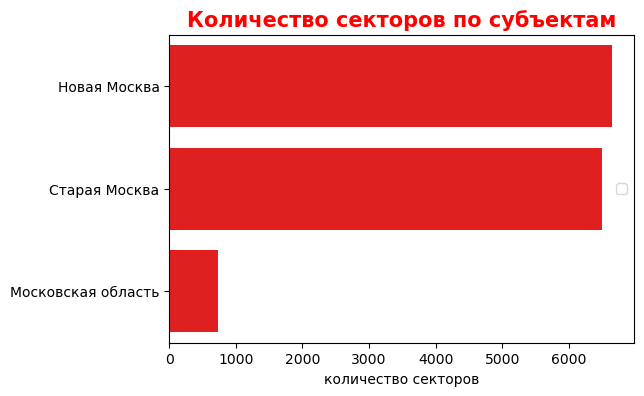

In [65]:
# визуализация соотнощения секторов по субъектам Московской агломерации
plt.figure(figsize=(6,4))
sns.countplot(y = 'sub_ter' , order=clocation['sub_ter'].value_counts().index, color='Red', data = clocation) \
.set_title('Количество секторов по субъектам', fontweight='bold', color='Red', fontsize=15)
plt.xlabel('количество секторов', fontsize=10)
plt.ylabel('')
plt.legend(loc='center right')
plt.show()

In [66]:
counts_sub_ter

,count,loc
Новая Москва,0.48,1
Старая Москва,0.47,1
Московская область,0.05,1


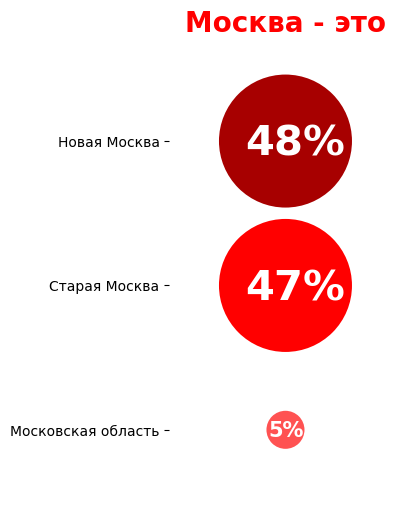

In [67]:
# визуализация количества округов, субъектов и административных районов Московской агломерации
fig, ax = plt.subplots(figsize=(3, 6))
sns.scatterplot(data=counts_sub_ter, x=counts_sub_ter['loc'], y=counts_sub_ter.index, size=counts_sub_ter['count'], \
                sizes=[1000, 10000, 10000], hue=counts_sub_ter['count'], legend=False, palette=sns.color_palette(colors)[2::-1])
plt.annotate('48%', xy=(0.981, 10**-1), fontsize=30, weight='bold', c='w')
plt.annotate('47%', xy=(0.981, 1.1), fontsize=30, weight='bold', c='w')
plt.annotate('5%', xy=(0.992, 2.05), fontsize=15, weight='bold', c='w')
plt.ylim(2.5,-0.7)
plt.box(on=None)
plt.xticks([])
plt.xlabel('')
plt.title('Москва - это', loc='center', fontweight='bold', color='r', fontsize=20)
plt.show()

### Анализ изменения численности населения одного из округа

In [68]:
# округа Московской агломерации
clocation['okrug_name'].unique()

array(['Троицкий административный округ', 'Чехов', 'Наро-Фоминск',
       'Подольск', 'Новомосковский административный округ',
       'Юго-Западный административный округ', 'Видное (Ленинский)',
       'Южный административный округ', 'Западный административный округ',
       'Одинцово', 'Дзержинский', 'Юго-Восточный административный округ',
       'Котельники', 'Люберцы', 'Восточный административный округ',
       'Центральный административный округ', 'Балашиха', 'Красногорск',
       'Северо-Западный административный округ', 'Реутов',
       'Северный административный округ',
       'Северо-Восточный административный округ', 'Мытищи', 'Химки',
       'Долгопрудный', 'Зеленоградский административный округ',
       'Солнечногорск'], dtype=object)

In [69]:
# случайная выборка одного округа
np.random.choice(clocation['okrug_name'].unique(), 1)

array(['Троицкий административный округ'], dtype=object)

[**Тро́ицкий администрати́вный о́круг**](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%BE%D0%B8%D1%86%D0%BA%D0%B8%D0%B9_%D0%B0%D0%B4%D0%BC%D0%B8%D0%BD%D0%B8%D1%81%D1%82%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9_%D0%BE%D0%BA%D1%80%D1%83%D0%B3) (ТАО) — самый большой по площади административный округ города Москвы, который образован 1 июля 2012 года в результате реализации проекта расширения территории города. Наряду с Новомосковским, один из двух новых административных округов Новой Москвы, притом более дальний, несмежный с городскими территориями в границах до 2011 года. Назван по единственному городу на данной территории — Троицку.

In [70]:
# выборка данных по выбранному округу
troitsky_okrug = clocation[clocation['okrug_name'] == 'Троицкий административный округ']

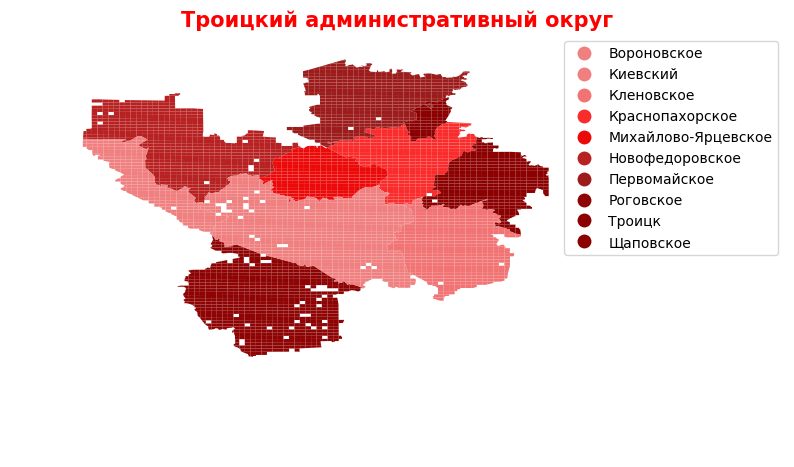

In [71]:
# визуализация административных районов в Троицком административном округе
troitsky_okrug.plot(column = 'adm_name', linewidth=0.5, cmap=rvb, legend=True, figsize=[10,20])
plt.ylim(55, 55.6)
plt.xlim(left=36.7, right=37.8)
plt.box(on=None)
plt.xticks([])
plt.yticks([])
plt.title('Троицкий административный округ', loc='center', fontweight='bold', color='r', fontsize=15)
plt.show()

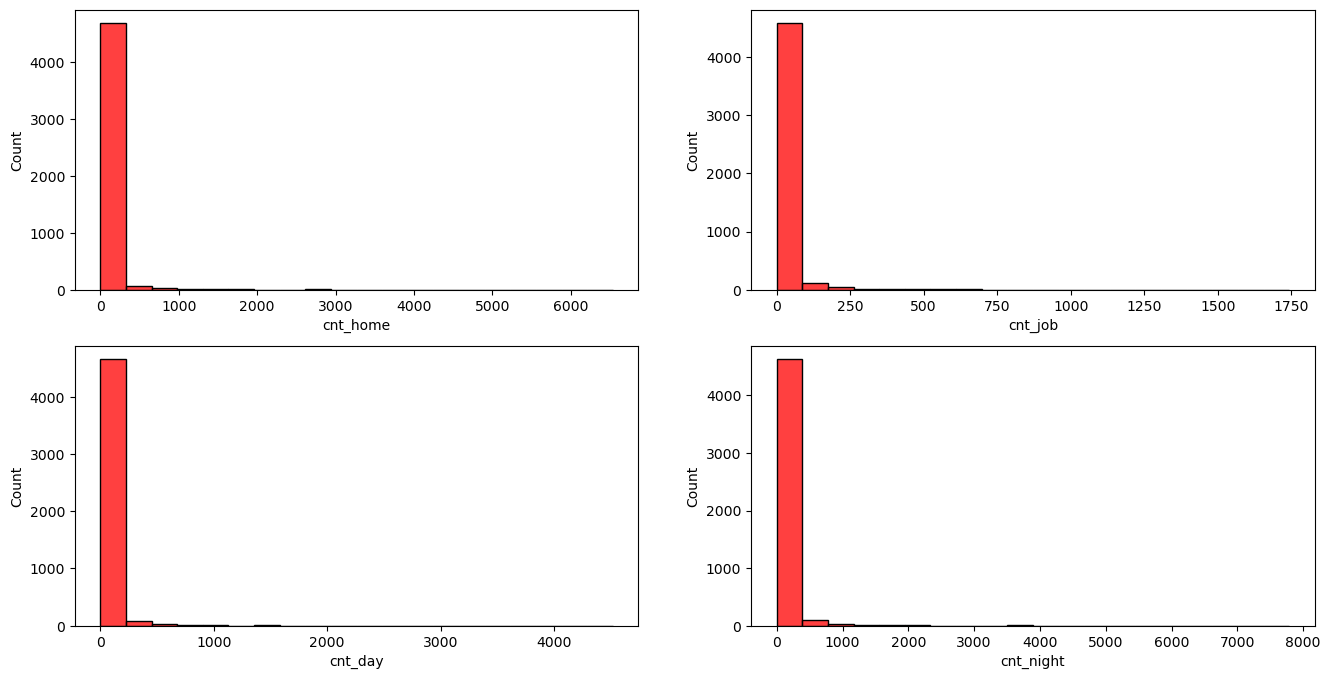

In [72]:
# визуализация распределения признаков изменения численности населения в Троицком административном округе
width = 2
height = 2
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(indicator):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=troitsky_okrug, color='r',
            x=column_name, bins = 20);

In [73]:
# корреляция признаков изменения численности населения в Троицком административном округе
troitsky_okrug_corr = troitsky_okrug.iloc[:,1:5].corr()
troitsky_okrug_corr

,cnt_home,cnt_job,cnt_day,cnt_night
cnt_home,1.00,0.90,0.98,0.99
cnt_job,0.90,1.00,0.96,0.91
cnt_day,0.98,0.96,1.00,0.97
cnt_night,0.99,0.91,0.97,1.00


C:\Users\rus_k\AppData\Local\Temp\ipykernel_7840\3671738808.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(troitsky_okrug_corr, dtype=np.bool))


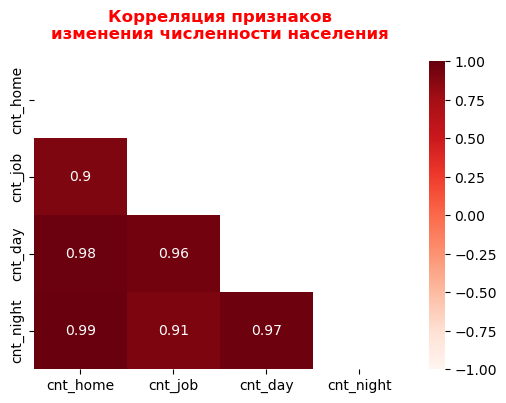

In [74]:
# визуализация корреляции признаков изменения численности населения в Троицком административном округе
plt.figure(figsize=(6, 4))
mask = np.triu(np.ones_like(troitsky_okrug_corr, dtype=np.bool))
clocation_corr_heatmap = sns.heatmap(troitsky_okrug_corr, mask=mask, vmin=-1, vmax=1, \
                                     annot=True, cmap='Reds')
clocation_corr_heatmap.set_title('Корреляция признаков\nизменения численности населения', \
                                 c='r', fontweight='bold', fontdict={'fontsize':12}, pad=16);

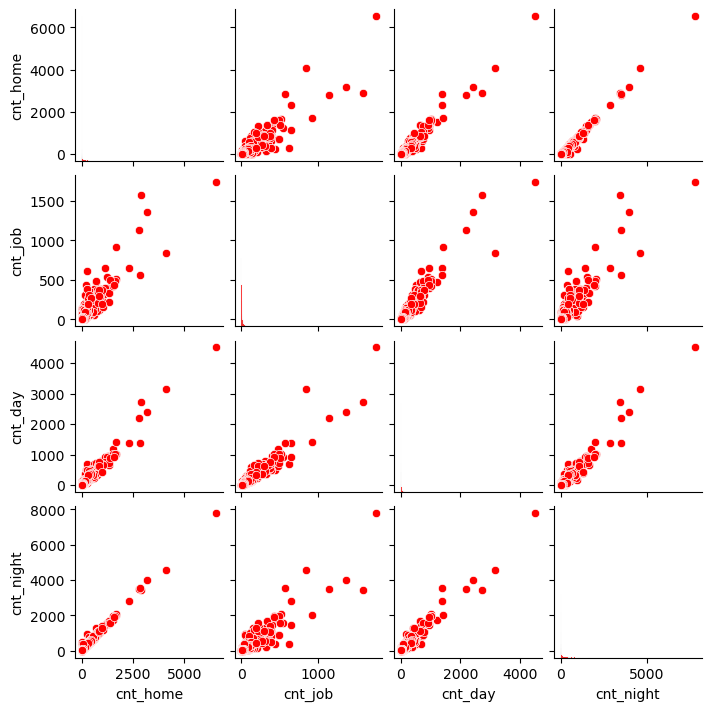

In [75]:
# визуализация корреляции признаков изменения численности населения в Троицком административном округе
sns.pairplot(troitsky_okrug.iloc[:,1:5], diag_kind='hist', height=1.8, diag_kws={'color':'red'}, plot_kws={'color':'red'})
plt.show()

In [76]:
# вывод данных
troitsky_okrug.head()

,zid,cnt_home,cnt_job,cnt_day,cnt_night,geometry,adm_name,okrug_name,sub_ter,area,conts_zid
0,32909,1,0,0,3,"MULTIPOLYGON (((37.038 55.145, 37.041 55.145, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1
2,32910,2,0,0,4,"MULTIPOLYGON (((37.041 55.143, 37.041 55.145, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,2
3,33261,0,0,0,2,"MULTIPOLYGON (((37.030 55.149, 37.033 55.149, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1
4,33262,1,0,0,5,"MULTIPOLYGON (((37.033 55.148, 37.033 55.149, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1
5,33263,0,0,0,4,"MULTIPOLYGON (((37.041 55.145, 37.041 55.149, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1


In [77]:
# расчет площади по административным районам
troitsky_okrug_area = troitsky_okrug.groupby('adm_name')['area'].sum().sort_values(ascending=False)
troitsky_okrug_area

adm_name
Вороновское           223.50
Роговское             179.50
Новофедоровское       158.50
Первомайское          135.75
Кленовское            129.75
Краснопахорское       107.00
Щаповское              96.50
Михайлово-Ярцевское    76.75
Киевский               68.75
Троицк                 22.75
Name: area, dtype: float64

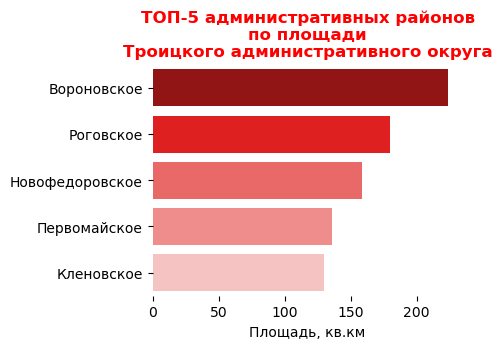

In [78]:
# визуализация ТОП-5 административных районов Троицкого административного округа по площади
plt.figure(figsize=(4,3))
sns.barplot(x=troitsky_okrug_area.values[:5], y=troitsky_okrug_area.index[:5], palette=sns.color_palette(colors))
plt.title('ТОП-5 административных районов\nпо площади\nТроицкого административного округа', c='r', fontweight='bold', fontsize=12)
plt.box(on=None)
plt.xlabel('Площадь, кв.км')
plt.ylabel('')
plt.show()

In [79]:
# вывод данных
troitsky_okrug.head()

,zid,cnt_home,cnt_job,cnt_day,cnt_night,geometry,adm_name,okrug_name,sub_ter,area,conts_zid
0,32909,1,0,0,3,"MULTIPOLYGON (((37.038 55.145, 37.041 55.145, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1
2,32910,2,0,0,4,"MULTIPOLYGON (((37.041 55.143, 37.041 55.145, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,2
3,33261,0,0,0,2,"MULTIPOLYGON (((37.030 55.149, 37.033 55.149, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1
4,33262,1,0,0,5,"MULTIPOLYGON (((37.033 55.148, 37.033 55.149, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1
5,33263,0,0,0,4,"MULTIPOLYGON (((37.041 55.145, 37.041 55.149, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1


In [80]:
# удаление признака сектора
troitsky_okrug.drop(columns='zid', inplace=True)

C:\Users\rus_k\AppData\Local\Temp\ipykernel_7840\2795891297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  troitsky_okrug.drop(columns='zid', inplace=True)


In [81]:
# пересчет показателей изменения численности населения с учетом пересечения секторов
troitsky_okrug = troitsky_okrug.iloc[:,:4].apply(lambda x: x / troitsky_okrug['conts_zid']) \
                                          .merge(troitsky_okrug.iloc[:,4:], left_index=True, right_index=True)
troitsky_okrug.head()

,cnt_home,cnt_job,cnt_day,cnt_night,geometry,adm_name,okrug_name,sub_ter,area,conts_zid
0,1.00,0.00,0.00,3.00,"MULTIPOLYGON (((37.038 55.145, 37.041 55.145, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1
2,1.00,0.00,0.00,2.00,"MULTIPOLYGON (((37.041 55.143, 37.041 55.145, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,2
3,0.00,0.00,0.00,2.00,"MULTIPOLYGON (((37.030 55.149, 37.033 55.149, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1
4,1.00,0.00,0.00,5.00,"MULTIPOLYGON (((37.033 55.148, 37.033 55.149, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1
5,0.00,0.00,0.00,4.00,"MULTIPOLYGON (((37.041 55.145, 37.041 55.149, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1


In [82]:
# расчет суммарного количества изменения населения по административным округам
troitsky_okrug_customers =  troitsky_okrug.groupby('adm_name')[indicator].sum()
troitsky_okrug_customers

,cnt_home,cnt_job,cnt_day,cnt_night
adm_name,,,,
Вороновское,"18,031.00","10,755.33","16,584.83","30,032.75"
Киевский,"9,336.83","3,786.00","7,985.50","15,962.42"
Кленовское,"7,862.50","4,238.50","6,671.50","12,907.83"
Краснопахорское,"18,669.42","10,898.42","17,182.25","29,054.25"
Михайлово-Ярцевское,"9,225.58","4,205.08","7,501.92","15,418.75"
Новофедоровское,"14,682.00","6,374.00","11,677.00","25,118.50"
Первомайское,"37,267.08","15,857.25","27,438.92","57,844.42"
Роговское,"5,867.33","3,409.17","5,269.00","11,958.75"
Троицк,"39,477.67","16,518.67","29,892.67","52,030.50"


In [83]:
# максимальное значение показателя для визуализации
troitsky_okrug_customers.max().max()

57844.416666666664

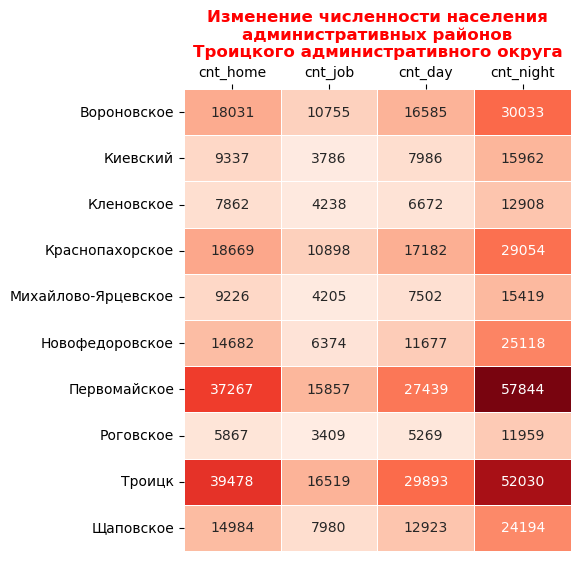

In [84]:
# визуализация рассчитанных показателей изменения численности по административным районам
f, ax = plt.subplots(figsize=(5, 6))
sns.heatmap(troitsky_okrug_customers, vmin=0, vmax=60000, linewidths=.5, fmt='.0f', annot=True, cmap='Reds', cbar=False)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title('Изменение численности населения\nадминистративных районов\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.ylabel('')
plt.show()

Из статистики изменения численности начеления Троицкого административного округа установлено:
* наибольшее количество населения зафиксировано в административном центре округа и Первомайском районе
* количество население не пропорционально площади административного района
* количество населения по соответствующим районам не значительно по сравнению с количеством населения, которое там проживает и ночует, что свидетельствует о миграции населения на работу в другие округа Московской агломерации

In [85]:
# нормирование показателей изменения численности населения с учетом площади административного района
troitsky_okrug_new_customers = troitsky_okrug_customers.apply(lambda x: x / troitsky_okrug_area)
troitsky_okrug_new_customers

,cnt_home,cnt_job,cnt_day,cnt_night
adm_name,,,,
Вороновское,80.68,48.12,74.21,134.37
Киевский,135.81,55.07,116.15,232.18
Кленовское,60.60,32.67,51.42,99.48
Краснопахорское,174.48,101.85,160.58,271.54
Михайлово-Ярцевское,120.20,54.79,97.74,200.90
Новофедоровское,92.63,40.21,73.67,158.48
Первомайское,274.53,116.81,202.13,426.11
Роговское,32.69,18.99,29.35,66.62
Троицк,"1,735.28",726.10,"1,313.96","2,287.05"


In [86]:
# максимальное значение показателя для визуализации
troitsky_okrug_new_customers.max().max()

2287.054945054945

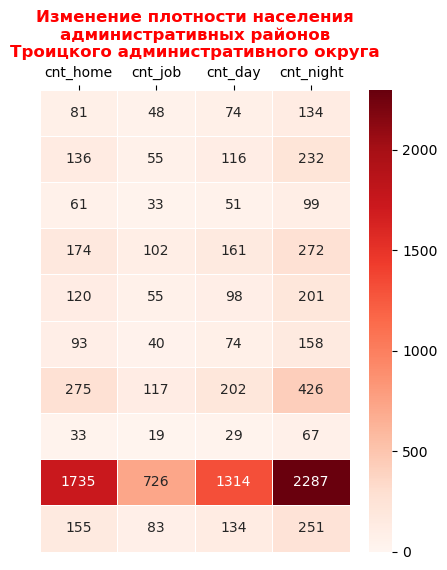

In [87]:
# визуализация рассчитанных показателей изменения численности по административным районам
f, ax = plt.subplots(figsize=(5, 6))
sns.heatmap(troitsky_okrug_new_customers, vmin=0, vmax=2300, linewidths=.5, fmt='.0f', annot=True, cmap='Reds')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title('Изменение плотности населения\nадминистративных районов\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.yticks([])
plt.ylabel('')
plt.show()

**ВЫВОДЫ** \
Из статистики изменения плотности начеления Троицкого административного округа установлено:
* наибольшая плотность населения зафиксирована в административном центре округа
* наименьшая плотность населения зафиксирована в административных районах округа
Тем самым плотность населения может служить основным показателем рейтинга самодостаточности районов города Москва

### Предлагаемые показатели изменения численности населения Московской агломерации

In [88]:
troitsky_okrug_new_customers

,cnt_home,cnt_job,cnt_day,cnt_night
adm_name,,,,
Вороновское,80.68,48.12,74.21,134.37
Киевский,135.81,55.07,116.15,232.18
Кленовское,60.60,32.67,51.42,99.48
Краснопахорское,174.48,101.85,160.58,271.54
Михайлово-Ярцевское,120.20,54.79,97.74,200.90
Новофедоровское,92.63,40.21,73.67,158.48
Первомайское,274.53,116.81,202.13,426.11
Роговское,32.69,18.99,29.35,66.62
Троицк,"1,735.28",726.10,"1,313.96","2,287.05"


In [89]:
# антирейтинг административных районов по динамике изменения плотности численности населения
troitsky_okrug_new_customers.std(axis=1).sort_values()

adm_name
Роговское              20.65
Кленовское             28.14
Вороновское            36.20
Новофедоровское        49.78
Михайлово-Ярцевское    61.32
Щаповское              70.32
Краснопахорское        70.38
Киевский               73.46
Первомайское          131.09
Троицк                660.15
dtype: float64

In [90]:
# антирейтинг административных районов по динамике изменения плотности численности населения
troitsky_okrug_rating = troitsky_okrug_new_customers.std(axis=1).sort_values() \
                                                    .rank(ascending=False)
troitsky_okrug_rating

adm_name
Роговское             10.00
Кленовское             9.00
Вороновское            8.00
Новофедоровское        7.00
Михайлово-Ярцевское    6.00
Щаповское              5.00
Краснопахорское        4.00
Киевский               3.00
Первомайское           2.00
Троицк                 1.00
dtype: float64

Интерпритация **антирейтинга**: 
* чем меньше динамика изменения численности населения, тем НЕ привлекательней район для населения

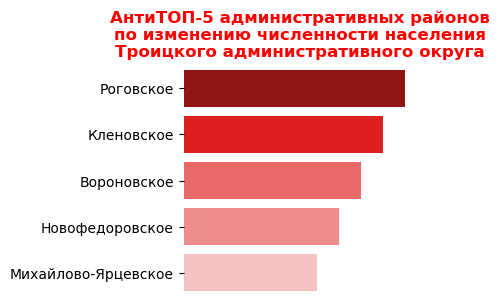

In [91]:
# визуализация антирейтинга административных районов по динамике изменения плотности численности населения
plt.figure(figsize=(3,3))
sns.barplot(x = troitsky_okrug_rating.values[:5], y = troitsky_okrug_rating.index[:5], palette=sns.color_palette(colors))
plt.title('АнтиТОП-5 административных районов\nпо изменению численности населения\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

In [92]:
# рейтинг административных районов по динамике изменения плотности численности населения
troitsky_okrug_rating = troitsky_okrug_new_customers.std(axis=1).sort_values(ascending=False) \
                                                    .rank()
troitsky_okrug_rating

adm_name
Троицк                10.00
Первомайское           9.00
Киевский               8.00
Краснопахорское        7.00
Щаповское              6.00
Михайлово-Ярцевское    5.00
Новофедоровское        4.00
Вороновское            3.00
Кленовское             2.00
Роговское              1.00
dtype: float64

Интерпритация **рейтинга**: 
* чем больше динамика изменения численности населения, тем ривлекательней район для населения

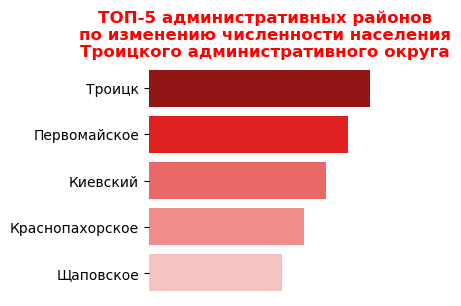

In [93]:
# визуализация рейтинга административных районов по динамике изменения плотности численности населения
plt.figure(figsize=(3,3))
sns.barplot(x=troitsky_okrug_rating.values[:5], y=troitsky_okrug_rating.index[:5], palette=sns.color_palette(colors))
plt.title('ТОП-5 административных районов\nпо изменению численности населения\nТроицкого административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

In [94]:
# вывод данных
troitsky_okrug.head()

,cnt_home,cnt_job,cnt_day,cnt_night,geometry,adm_name,okrug_name,sub_ter,area,conts_zid
0,1.00,0.00,0.00,3.00,"MULTIPOLYGON (((37.038 55.145, 37.041 55.145, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1
2,1.00,0.00,0.00,2.00,"MULTIPOLYGON (((37.041 55.143, 37.041 55.145, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,2
3,0.00,0.00,0.00,2.00,"MULTIPOLYGON (((37.030 55.149, 37.033 55.149, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1
4,1.00,0.00,0.00,5.00,"MULTIPOLYGON (((37.033 55.148, 37.033 55.149, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1
5,0.00,0.00,0.00,4.00,"MULTIPOLYGON (((37.041 55.145, 37.041 55.149, ...",Роговское,Троицкий административный округ,Новая Москва,0.25,1


In [95]:
# вывод данных
troitsky_okrug_new_customers.head()

,cnt_home,cnt_job,cnt_day,cnt_night
adm_name,,,,
Вороновское,80.68,48.12,74.21,134.37
Киевский,135.81,55.07,116.15,232.18
Кленовское,60.60,32.67,51.42,99.48
Краснопахорское,174.48,101.85,160.58,271.54
Михайлово-Ярцевское,120.20,54.79,97.74,200.90


In [96]:
# расчет отношения количества населения проживавших в районе и ночевавших в районе
troitsky_okrug_new_customers['cnt_home_night'] = troitsky_okrug_new_customers['cnt_home'] / troitsky_okrug_new_customers['cnt_night']

In [97]:
# расчет отношения количества населения работавших в районе и находившихся в районе
troitsky_okrug_new_customers['cnt_job_day'] = troitsky_okrug_new_customers['cnt_job'] / troitsky_okrug_new_customers['cnt_day']

In [98]:
# вывод данных
troitsky_okrug_new_customers

,cnt_home,cnt_job,cnt_day,cnt_night,cnt_home_night,cnt_job_day
adm_name,,,,,,
Вороновское,80.68,48.12,74.21,134.37,0.60,0.65
Киевский,135.81,55.07,116.15,232.18,0.58,0.47
Кленовское,60.60,32.67,51.42,99.48,0.61,0.64
Краснопахорское,174.48,101.85,160.58,271.54,0.64,0.63
Михайлово-Ярцевское,120.20,54.79,97.74,200.90,0.60,0.56
Новофедоровское,92.63,40.21,73.67,158.48,0.58,0.55
Первомайское,274.53,116.81,202.13,426.11,0.64,0.58
Роговское,32.69,18.99,29.35,66.62,0.49,0.65
Троицк,"1,735.28",726.10,"1,313.96","2,287.05",0.76,0.55


In [99]:
# вывод полученных показателей
troitsky_okrug_new_customers[['cnt_home_night', 'cnt_job_day']].sort_values(by=['cnt_home_night', 'cnt_job_day'], \
                                                                            ascending=[False, False])

,cnt_home_night,cnt_job_day
adm_name,,
Троицк,0.76,0.55
Первомайское,0.64,0.58
Краснопахорское,0.64,0.63
Щаповское,0.62,0.62
Кленовское,0.61,0.64
Вороновское,0.60,0.65
Михайлово-Ярцевское,0.60,0.56
Киевский,0.58,0.47
Новофедоровское,0.58,0.55


Интерпритация:
* чем больше проживает населения в районе, тем он привлекательней
* если количество проживающего населения в районе не значительно, значит данное население вынуждено ночевать в других районах округа
* чем больше начеления работает, тем он привлекательней